<a href="https://colab.research.google.com/github/GabrielVideira/PythonDataScience/blob/main/TC_fase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Tech Challenge**

Tech Challenge é o projeto que englobará os conhecimentos obtidos em todas as disciplinas da fase. Esta é uma atividade que, em princípio, deve ser desenvolvida em grupo.

Importante atentar-se ao prazo de entrega, pois trata-se de uma atividade obrigatória, uma vez que sua pontuação se refere a 90% da nota final.


Imagine agora, que você vai atuar como Expert em Data Analytics em uma empresa que exporta vinhos do Brasil para o mundo todo. Sua área é recém-criada dentro da empresa, e você será responsável pelos relatórios iniciais a serem apresentados em uma reunião de investidores e acionistas, explicando a quantidade de vinhos exportados e os fatores externos que podem vir a surgir e que interferem nas análises:
1. Dados climáticos.
2. Dados demográficos.
3. Dados econômicos.
4. Dados de avaliações de vinhos.


O Head de Dados pediu para que você construísse uma tabela contendo
as seguintes informações:

1. País de origem (Brasil).
2. País de destino.
3. Quantidade em litros de vinho exportado (utilize: 1KG =1L).
4. Valor em US$.

Os dados que lhe forneceram são de uma vinícola parceira, e podem ser
encontrados aqui: http://vitibrasil.cnpuv.embrapa.br/index.php?opcao=opt_01

Seu objetivo é dizer o montante de venda de exportação nos últimos 15
anos, separando a análise por país e trazendo quais as prospecções futuras e
possíveis ações para uma melhoria nas exportações.

Construa gráficos atraentes e que passem a ideia central para que os acionistas e investidores possam seguir em frente com suas ações.



***Dica: para construir uma boa análise, utilize várias bases do mesmo site!
Outro ponto interessante, é utilizar os dados externos citados acima para
enriquecer ainda mais a mensagem que você quer passar.***

### **Conhecendo e tratando os Dados**

**Dados da Vitinicultura**

A <b>Embrapa Uva e Vinho</b> apresenta em seu site(http://vitibrasil.cnpuv.embrapa.br/index.php?opcao=opt_01) iformações referentes à quantidade de uvas processadas, produção e comercialização de vinhos, suco e derivados provenientes do Estado do Rio Grande do Sul, que representa mais de 90% da produção nacional. Apresentam também os dados de importações e portações dos produtos da vitivinicultura.

Alguns esclarecimentos se fazem necessários, para que os usuários façam o uso correto das informações:

* Os vinhos nacionais são classificados para fins estatísticos em vinho de mesa (elaborados com uvas americanas e/ou híbridas), vinho fino de mesa (elaborados com uvas Vitis Vinifera L.) e vinho especial (corte de vinho de mesa e fino de mesa).

* Os vinhos importados, denominados de vinhos de mesa são equivalentes aos * vinhos finos de mesa nacionais, pois são elaborados com uvas Vitis Vinifera L.

* Os dados constantes da base de dados ALICEweb, referentes à vinhos e espumantes são expressos em quilos, no entanto considerando que a densidade desses produtos é de aproximadamente um (1), consideramos 1 Kg = 1L.

* Os arquivos de download possuem a extensão CSV, para facilitar a importação em planilhas ou banco de dados.

In [ ]:
# Bibliotecas usadas
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [202]:
df_prod = pd.read_csv("/content/Producao.csv", encoding='utf-8', sep=';')
df_prod = df_prod.drop(columns=['id', 'control'])
df_prod.produto = df_prod.produto.str.title()
df_prod = df_prod.set_index('produto')
df_prod = df_prod.iloc[:,-15:]
# Colunas usadas serão a de controle(contem os tipos de uva/vinho) e o restante são os anos.
# Os resultados das linhas são litros Ex: na coluna 1970 linha 0 foram produzidos 217.208.604 litros.
# Estarei usando somente os ultimos 15 anos como o desafio diz exatamente isso

In [218]:
df_comercio = pd.read_csv("/content/Comercio.csv", encoding='utf-8', sep=';')
df_comercio = df_comercio.drop(columns=['id', 'control'])
df_comercio.Produto = df_comercio.Produto.str.title()
df_comercio = df_comercio.set_index('Produto')
df_comercio = df_comercio.iloc[:,-15:]
# Colunas usadas serão a de controle(contem os tipos de uva/vinho) e o restante são os anos.
# Os resultados das linhas são litros Ex: na coluna 1970 linha 0 foram comercializados 98.327.606 litros.
# Estarei usando somente os ultimos 15 anos como o desafio diz exatamente isso


In [219]:
pd.options.display.float_format = '{:.2f}'.format

In [220]:
df_prod.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
produto,,,,,,,,,,,,,,,,
Vinho De Mesa,205418206,195267980,257840749,212777037,196904222,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611,169762429,2841923901
Tinto,164143454,157290088,210113358,175875432,163111797,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214,139320884,2136239854
Branco,39211278,35408083,46007504,34938249,32066403,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430,27910299,648254980
Rosado,2063474,2569809,1719887,1963356,1726022,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968,2531246,57429068
Vinho Fino De Mesa (Vinifera),39900568,24805713,47598471,45200730,45782530,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796,46268556,587604482


In [221]:
df_prod.describe()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
count,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00
mean,13404775.06,12604329.14,18060873.22,16815749.02,14574065.45,14677186.47,17360851.53,7864719.37,19052227.02,16382465.22,15801539.53,12490674.16,19111323.53,17523675.04,17952661.57,233677115.31
std,38037817.54,36181490.27,49003037.74,42960744.41,38089760.21,37982768.38,43530934.32,19403148.50,50842599.71,43798130.95,38338729.81,29146188.05,45710748.97,43520443.24,44266361.21,575153411.41
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,221.00,0.00,0.00,53451.50
50%,0.00,5817.00,0.00,0.00,100.00,2700.00,922.00,0.00,3000.00,2000.00,32519.00,46000.00,30000.00,5000.00,17200.00,899851.00
75%,1271458.50,1548057.00,2100003.50,2380510.50,1598361.00,1504279.00,1536993.00,1033047.50,1759016.00,1533595.00,1757118.50,2747322.00,3824399.50,3138015.50,3974682.00,33927301.00
max,205418206.00,195267980.00,257840749.00,212777037.00,196904222.00,196173123.00,210308560.00,86319015.00,255015187.00,218375636.00,144629737.00,124200414.00,173899995.00,195031611.00,174716647.00,2841923901.00


In [222]:
df_comercio.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Produto,,,,,,,,,,,,,,,
Vinho De Mesa,234525979,221242945,230310468,206969571,221590810,206404427,209198468,166769622,176059959,177186273,180446489,215557931,210012238,187939996,187016848
Tinto,193004182,188649074,196562722,173964776,188033494,178250072,182028785,146646365,154309442,155115499,158519218,189573423,185653678,165067340,165097539
Rosado,2307580,2036928,1668823,1738134,1777648,1419855,1409002,1391942,1097426,1972944,1265435,1394901,1931606,2213723,2520748
Branco,39214217,30556943,32078923,31266661,31779668,26734500,25760681,18731315,20653091,20097830,20661836,24589607,22426954,20658933,19398561
Vinho Fino De Mesa,33080270,21390159,19967310,22469950,27912934,20424983,20141631,19630158,15874354,14826143,15684588,24310834,27080445,21533487,18589310


In [223]:
df_comercio.describe()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00
mean,10960489.56,10375917.13,10847644.94,10380151.44,11626082.74,11084658.15,11489827.16,9416294.85,9850568.58,10461880.74,13447368.79,14400380.56,14773220.19,14390021.53,14578660.32
std,38609159.55,36883602.37,38539834.08,34748250.96,37876890.36,36058896.55,37614328.08,30157122.12,32198775.72,34194519.73,38323443.64,42045619.34,41593781.74,39205023.74,40386573.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.50,2856.75,1953.25,2379.75,4161.75,2377.50
50%,29035.00,56751.00,124616.00,81295.00,96060.00,80673.00,119040.50,66048.50,55967.00,121457.00,338717.50,198860.50,328257.50,294542.00,378391.00
75%,2872296.00,3238676.00,3288837.50,3923090.75,3645965.75,3906140.25,3343750.00,2935857.50,2694804.50,3332817.50,5321690.00,5815971.25,5620649.50,5221489.25,4773561.00
max,234525979.00,221242945.00,230310468.00,206969571.00,221590810.00,206404427.00,209198468.00,166769622.00,176059959.00,177186273.00,180446489.00,215557931.00,210012238.00,187939996.00,187016848.00


### **Analisando quantidade de litros produzidos x comercializados**

In [224]:
df_prod_sum = df_prod.sum()

Text(0, 0.5, 'Litros')

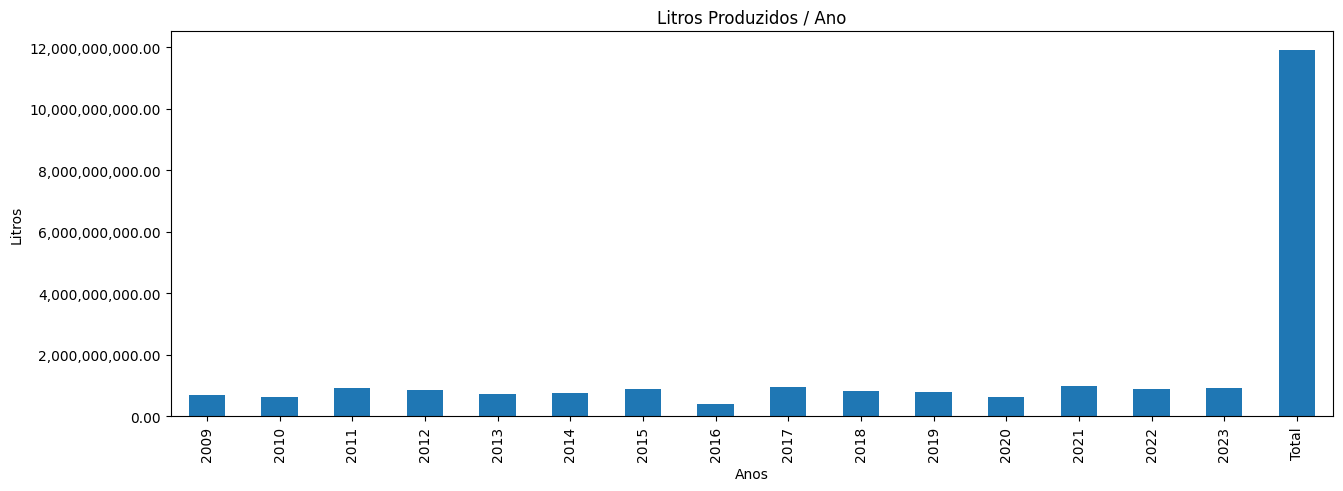

In [225]:
axis = df_prod_sum.plot(kind='bar', figsize=(15,5))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Litros Produzidos / Ano')
plt.xlabel('Anos')
plt.ylabel('Litros')

In [226]:
df_comercio_sum = df_comercio.sum()

Text(0, 0.5, 'Litros')

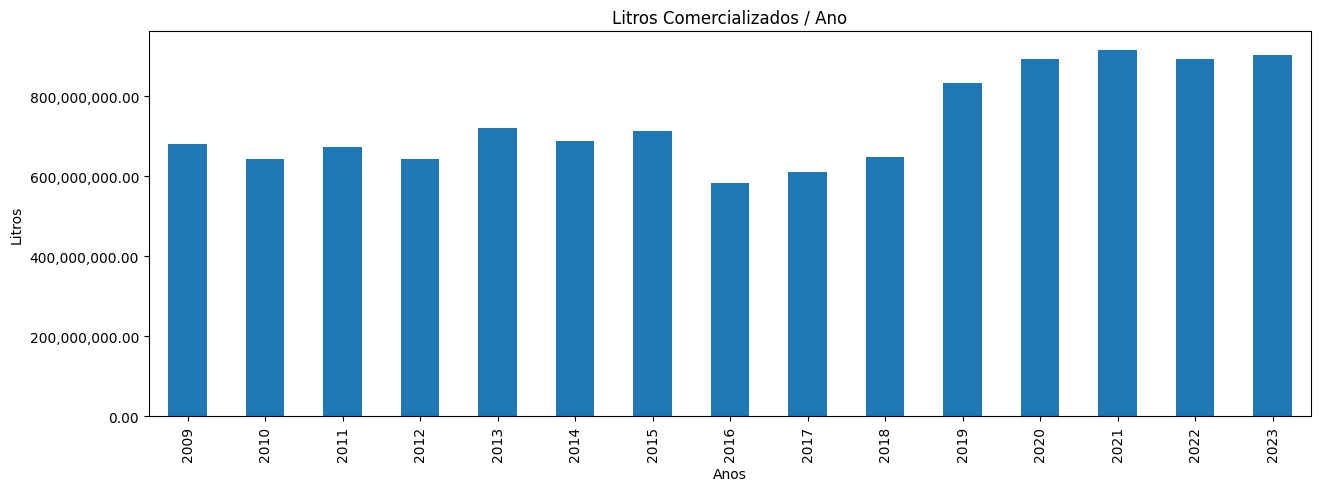

In [227]:
axis = df_comercio_sum.plot(kind='bar', figsize=(15,5))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Litros Comercializados / Ano')
plt.xlabel('Anos')
plt.ylabel('Litros')

### **Analisando os tipos de Uva/Vinhos**

In [234]:
df_prod['Total'] = df_prod.sum(axis=1)
df_prod_sorted = df_prod.sort_values(by='Total', ascending=False)
df_prod_sorted.Total.head(10)
# Top 10 produtos mais produzidos em litros de todos os tempos

,Total
produto,
Vinho De Mesa,14209619505
Tinto,10681199270
Derivados,7523873385
Mosto Simples,6900542590
Suco,5122316895
Branco,3241274900
Suco De Uva Integral,2941372015
Vinho Fino De Mesa (Vinifera),2938022410
Suco De Uva Concentrado,2155057225


In [ ]:
df_prod_sorted = df_prod_sorted.drop(columns=['Total'])
df_prod_sorted_head = df_prod_sorted.head(5)
df_prod_sorted_t = df_prod_sorted_head.T

Text(0, 0.5, 'Litros')

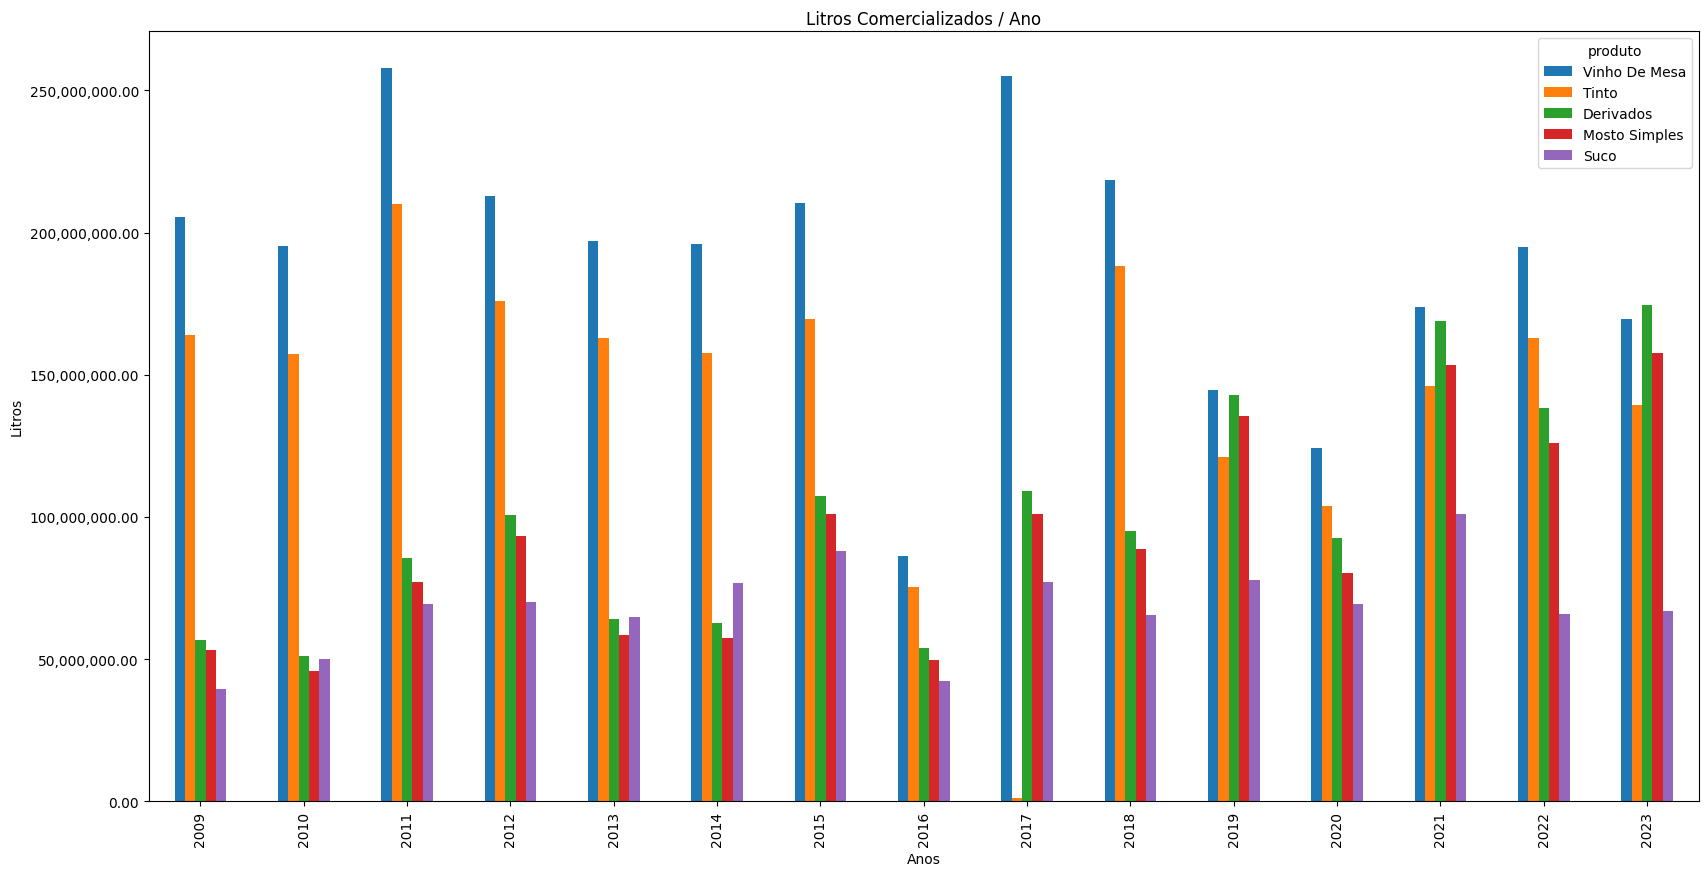

In [230]:
axis = df_prod_sorted_t.plot(kind='bar', figsize=(20,10))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Litros Produzidos / Ano')
plt.xlabel('Anos')
plt.ylabel('Litros')

In [235]:
df_comercio['Total'] = df_comercio.sum(axis=1)
df_comercio_sorted = df_comercio.sort_values(by='Total', ascending=False)
df_comercio_sorted.Total.head(10)
# Top 10 produtos mais comercializados em litros de todos os tempos

,Total
Produto,
Vinho De Mesa,3031232024
Tinto,2620475609
Suco De Uvas,1547015869
Suco Natural Integral,606070377
Suco De Uvas Concentrado,472372673
Outros Produtos Comercializados,454393836
Branco,384609720
Vinho Fino De Mesa,322916556
Espumantes,292420204


In [236]:
df_comercio_sorted = df_comercio_sorted.drop(columns=['Total'])
df_comercio_sorted_head = df_comercio_sorted.head(5)
df_comercio_sorted_t = df_comercio_sorted_head.T

Text(0, 0.5, 'Litros')

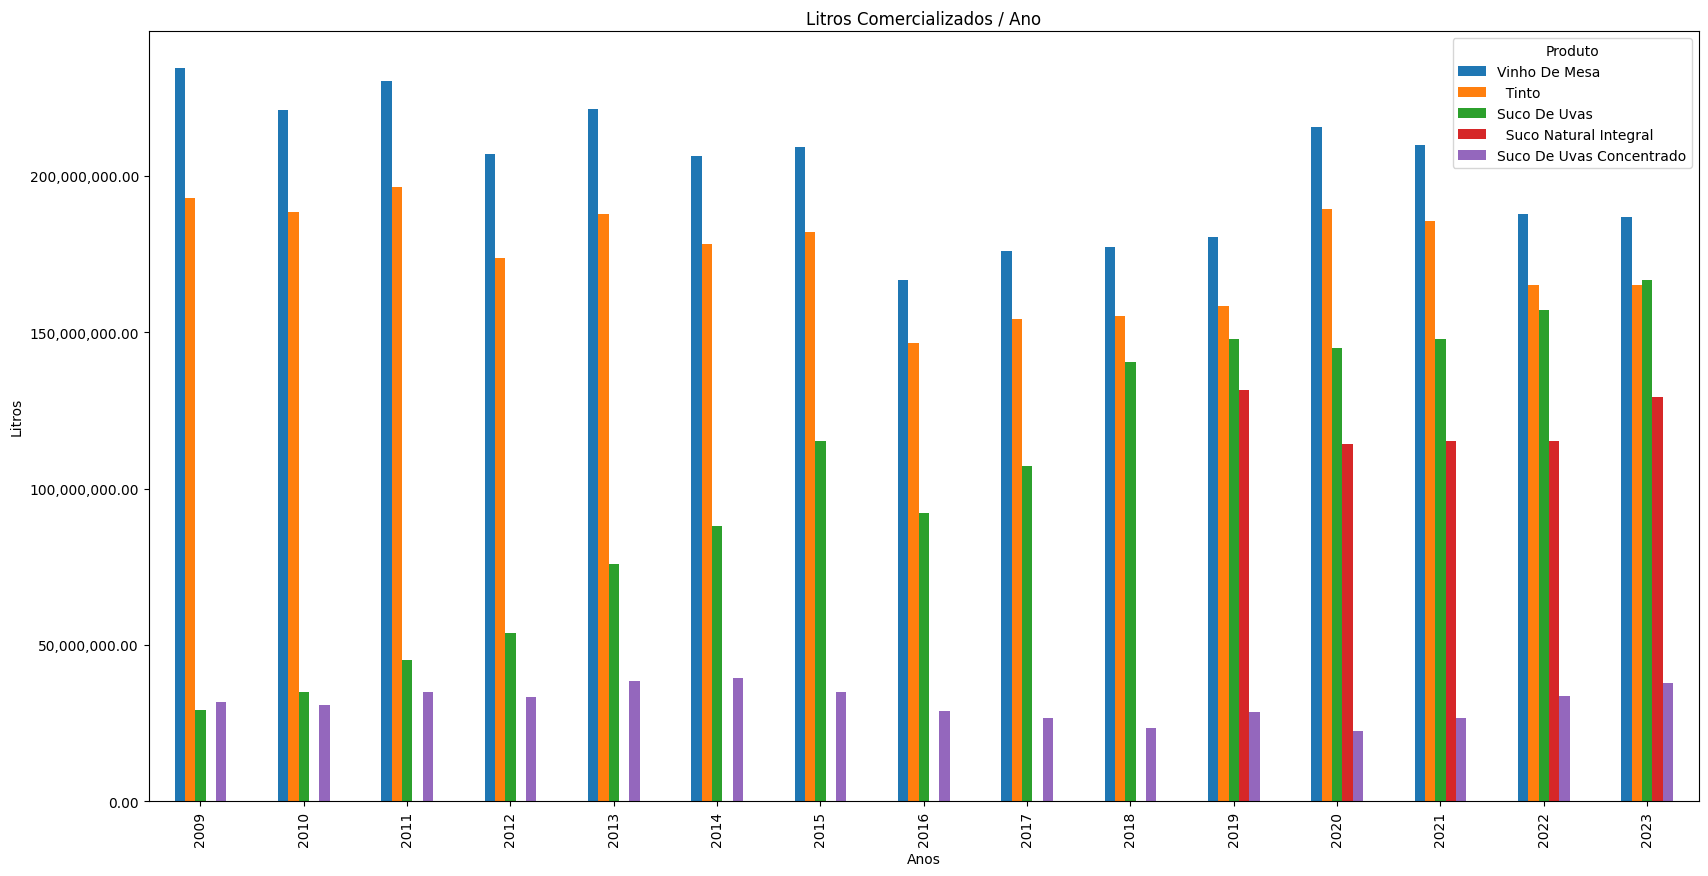

In [237]:
axis = df_comercio_sorted_t.plot(kind='bar', figsize=(20,10))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Litros Comercializados / Ano')
plt.xlabel('Anos')
plt.ylabel('Litros')